### Install Packages and Import Dataset

In this notebook, we’ll be working with a data set from the `palmerpenguins` package. This dataset contains two variables—penguin bill (A bill is another term for a bird’s beak) and flipper length (In penguins, the flipper is their equivalent of a wing.), both in millimeters—to determine whether there are distinct types of penguins in our data.

In this case, we don’t have any labels or categories already given to us. That means no one has told us what group each data point belongs to. By looking at the features of the data, like patterns or similarities, we might be able to discover new species or create our own categories based on what we find in the data.

This dataset was obtained from [kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)

In [2]:
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Output DataFrames
set_config(transform_output="pandas")

Let's begin by reading in our DataFrame.

In [3]:
penguins = pd.read_csv('penguins.csv')
penguins.head() 

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190


We will standardize our data so that prior to clustering to ensures that all features contribute equally to the distance calculations, preventing any single feature from dominating the results due to its scale.

> **Side note:**  
>  
> We will standardize our data prior to clustering to ensure that all features contribute equally to the distance calculations, preventing any single feature from dominating the results due to its scale. 
> 
> In clustering, distances between data points matter. For example, features like bill length (32.1 to 59.6 mm) and flipper length (172 to 231 mm) have different ranges, and without standardization, flipper length could dominate the analysis. Standardizing ensures both features contribute equally to the grouping process, which is critical when feature ranges differ significantly, but less important when interpretation matters.
>

In [4]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the data
penguins_scaled = scaler.fit_transform(penguins)
penguins_scaled.head() 

,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373


### What is K-means Clustering?

K-means clustering is a way to group data points into **K** different groups, based on how similar or close the points are to each other. The number **K** is the number of clusters you want to find in the data. The main goal of K-means is to organize the data into clusters where the points in each cluster are close together, while points in different clusters are far apart.

In order to find these clusters, K-means performs two main steps over and over:

1. **Center Update**: It recalculates the center of each cluster by finding the average location of all the points in the cluster. The center is the "heart" of the cluster and represents the average point of that group.

2. **Label Update**: Each data point is then assigned to the nearest center (cluster). This step makes sure that every point belongs to the group with the closest center.

These two steps repeat until the centers stop moving and the points stay in the same groups. By doing this, K-means finds the best grouping of points, minimizing the distance between each point and its cluster center. This process ensures that similar points are grouped together, forming distinct clusters in the data.

#### How Does K-means Work?

##### **Step 1:** Create the K-means Model
To indicate that we are performing K-means clustering, we will create a KMeans model object. It takes at least one argument: the number of clusters `n_clusters`, **which we set to 3 randomly** (We'll come back to this.)

Note that the K-means algorithm uses a random initialization of assignments, we need to set a `random_state` so that our clustering will be reproducible.

Also to avoid ending up with a sub-optimal solution, we will run our model 10 tims (`n_init = 10`)

In [5]:
# Initialize model then fit to data
kmeans = KMeans(n_clusters=3,random_state=0,n_init=10)
kmeans.fit(penguins_scaled)

# Add cluster label to the dataset
penguins_scaled['Cluster'] = kmeans.labels_


##### **Step 2:** Cluster visualization

The KMeans object contains useful information for visualizing and evaluating clusters. To start, you can visualize the clusters with a colored scatter plot. First, add the cluster assignments to your penguins DataFrame using the `labels_` attribute of the KMeans object. This will help you see how the data points are grouped.

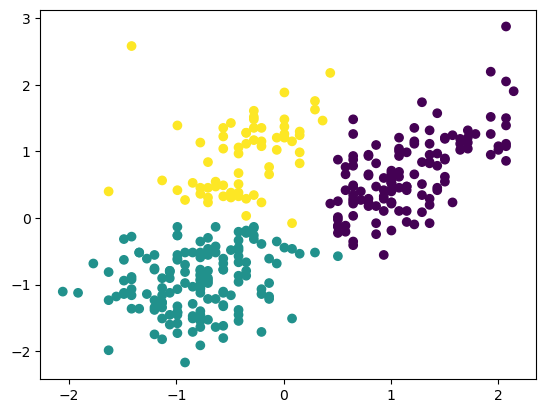

In [6]:
# Simple scatter plot of two features colored by cluster
plt.scatter(
    penguins_scaled['flipper_length_mm'], 
    penguins_scaled['bill_length_mm'], 
    c=penguins_scaled['Cluster']
)

Great! Now we know how to Create the K-means Model and Visualize it, but...

###  How do we Choose the **Optimal** Number of Clusters (K)?

Mathematically, the WSSD (Within-Cluster Sum of Squared Distances) formula is:

$$
\text{WSSD} = \sum_{i=1}^{k} \sum_{x \in C_i} \left( \| x - \mu_i \|^2 \right)
$$

Where:
- $k$ is the number of clusters.
- $ C_i $ is the set of points in cluster $ i $.
- $ \mu_i $ is the center (mean) of cluster $ i $.
- $ \| x - \mu_i \|^2 $ is the squared distance between a data point $ x $ and the center $ \mu_i $.

To find the best number of clusters, we use the **elbow method**. This involves plotting the total WSSD against different values of $k$ and looking for an “elbow”—the point where increasing the number of clusters no longer leads to a significant reduction in WSSD.

#### Thankfully...

we don’t need to manually calculate the WSSD using the formula. In scikit-learn, the total WSSD is already stored in the `.inertia_` attribute of the KMeans object.

In [8]:
# WSSD is stored in the inertia_ attribute 
kmeans.inertia_


157.8153218752378

To calculate the total WSSD for different values of $k$, we’re going to loop through several values of $k$ (the number of clusters) and run K-means for each one. We'll store the WSSD results for each $k$ in a DataFrame so we can compare them later.

In [10]:
total_wssd = [] # Create an empty list to store the total WSSD
for k in range(1, 11): # Iterate over possible cluster counts from 1 to 10
    km = KMeans(n_clusters=k, random_state=0, n_init=10) # Initialize the K-means model with k clusters and a fixed random seed for reproducibility, run 10 times
    km.fit(penguins_scaled) # Fit the model to the standardized penguin data
    total_wssd.append(km.inertia_) # Append the results for this k to the cumulative list


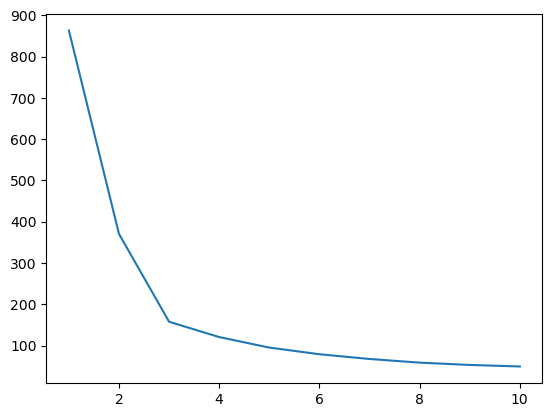

In [11]:
# Create the elbow plot
plt.plot(range(1, 11), total_wssd)

Three clusters appear to be the best choice because the plot shows a clear "elbow" at this point. This means that adding more clusters beyond three doesn't significantly reduce the WSSD, indicating that three clusters provide a good balance between capturing the structure in the data and minimizing the WSSD without over-complicating the model.

### Conclusion

In this notebook, we worked through exploratory analyses to identify meaningful subgroups (or clusters) in the data. Here's a summary of what we covered:

1. **Scaling**: We identify when it is necessary to scale variables before clustering.
2. **K-means clustering:** We implemented k-means clustering 
3. **Visualization:** We visualized the output of K-means clustering using a colored scatter plot.
4. **Elbow method:** We used the elbow method to choose the number of clusters for K-means. 


We hope this notebook has provided a practical understanding of data clustering,  and the application of machine learning algorithms like k-means. Feel free to experiment further with the dataset or the code to enhance your learning!